<h1> <big> <center> Matrix-Product-State Decomposition </center> </big> </h1>
<HR> $$\newcommand{\ket}[1]{\left|{#1}\right\rangle} \newcommand{\bra}[1]{\left\langle{#1}\right|} $$
First of all we introduce a random state in the hilbert-space of N spins
    \begin{equation}
    \ket{\psi} = \sum\limits_\vec{\sigma}c_\vec{\sigma} \ket{\vec{\sigma}}
    \end{equation}

In [2]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from ncon import ncon
from scipy.sparse.linalg import svds
import ncon

In [3]:
# Number of lattice sites
N = 6
# Local Hilbert-Space dimension
d = 2 
# Hilbert-Space dimension
dim = 2**N

uparrow = '\u2191'
downarrow = '\u2193'

basis = np.vectorize(np.binary_repr)(np.arange(0,2**N),width=N)
basis = np.vectorize(np.char.replace)(basis, '0', uparrow)
basis = np.vectorize(np.char.replace)(basis, '1', downarrow)

c = np.random.rand(dim) + 1j*np.random.rand(dim)
c = c/LA.norm(c)

In [3]:
# Just to fix the ideas
print(basis)
print(np.round(c,3))
print(c.shape)

['↑↑↑↑↑↑' '↑↑↑↑↑↓' '↑↑↑↑↓↑' '↑↑↑↑↓↓' '↑↑↑↓↑↑' '↑↑↑↓↑↓' '↑↑↑↓↓↑' '↑↑↑↓↓↓'
 '↑↑↓↑↑↑' '↑↑↓↑↑↓' '↑↑↓↑↓↑' '↑↑↓↑↓↓' '↑↑↓↓↑↑' '↑↑↓↓↑↓' '↑↑↓↓↓↑' '↑↑↓↓↓↓'
 '↑↓↑↑↑↑' '↑↓↑↑↑↓' '↑↓↑↑↓↑' '↑↓↑↑↓↓' '↑↓↑↓↑↑' '↑↓↑↓↑↓' '↑↓↑↓↓↑' '↑↓↑↓↓↓'
 '↑↓↓↑↑↑' '↑↓↓↑↑↓' '↑↓↓↑↓↑' '↑↓↓↑↓↓' '↑↓↓↓↑↑' '↑↓↓↓↑↓' '↑↓↓↓↓↑' '↑↓↓↓↓↓'
 '↓↑↑↑↑↑' '↓↑↑↑↑↓' '↓↑↑↑↓↑' '↓↑↑↑↓↓' '↓↑↑↓↑↑' '↓↑↑↓↑↓' '↓↑↑↓↓↑' '↓↑↑↓↓↓'
 '↓↑↓↑↑↑' '↓↑↓↑↑↓' '↓↑↓↑↓↑' '↓↑↓↑↓↓' '↓↑↓↓↑↑' '↓↑↓↓↑↓' '↓↑↓↓↓↑' '↓↑↓↓↓↓'
 '↓↓↑↑↑↑' '↓↓↑↑↑↓' '↓↓↑↑↓↑' '↓↓↑↑↓↓' '↓↓↑↓↑↑' '↓↓↑↓↑↓' '↓↓↑↓↓↑' '↓↓↑↓↓↓'
 '↓↓↓↑↑↑' '↓↓↓↑↑↓' '↓↓↓↑↓↑' '↓↓↓↑↓↓' '↓↓↓↓↑↑' '↓↓↓↓↑↓' '↓↓↓↓↓↑' '↓↓↓↓↓↓']
[0.018+0.06j  0.043+0.087j 0.141+0.022j 0.065+0.017j 0.113+0.085j
 0.122+0.107j 0.132+0.035j 0.13 +0.075j 0.012+0.038j 0.142+0.087j
 0.145+0.093j 0.147+0.093j 0.126+0.093j 0.137+0.138j 0.081+0.073j
 0.043+0.004j 0.037+0.117j 0.003+0.014j 0.14 +0.077j 0.139+0.115j
 0.095+0.03j  0.088+0.062j 0.076+0.13j  0.07 +0.043j 0.029+0.057j
 0.138+0.098j 0.038+0.097j 0.032+0.14j  0.01 +0.117j 0.141+0.052j
 0.135+0.089j 0.016

<h2>1. Left canonical decomposition of a state</h2>
<HR>
<h3>1.1 Single Value Decomposition</h3>

In [4]:
# We initialize again the coefficients of the chain
N   = 16
dim = d**N
c = np.random.rand(dim)+1j*np.random.rand(dim)
#for i in np.arange(dim):
#    if(bin(i).count('1')==N//2): c[i] = 0.
c = c/LA.norm(c)

# Save the configuration in order 
# to check the algorithm
c_check = c.copy()

# At every step A are a set of
# d matrices of dimension (r1 x r2)
A   = []
r1  = 1
for i in range(1,N+1):
    c = c.reshape(r1*d, d**(N-i))
    U, S, V = LA.svd(c,full_matrices=False)
    r2 = S.size
    A.append(U.reshape(d,r1,r2,order='F'))
    r1 = r2
    c  = (np.diag(S)@V)

res = A[0]
for i in range(1,N):
    res = np.tensordot(res,A[i],axes=[[i+1],[1]])
res = np.squeeze(res)
res_check = res.reshape(d**N)
print('Should be zero: ',LA.norm(c_check-res_check))
print('Should be one:  ',LA.norm(res_check))

Should be zero:  8.173171517933779e-15
Should be one:   1.000000000000001


<h2> Left Nomalization </h2>

$$\sum_{\sigma_l} A^\dagger_{\sigma_l} A_{\sigma_l} = \mathbb{I}$$

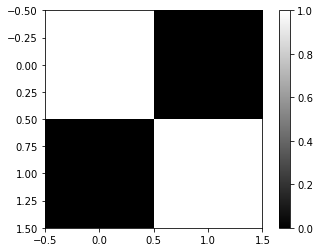

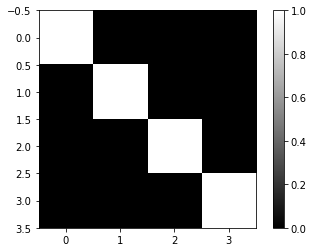

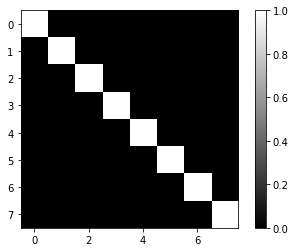

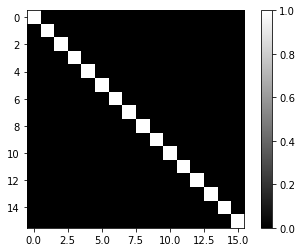

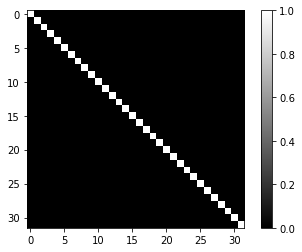

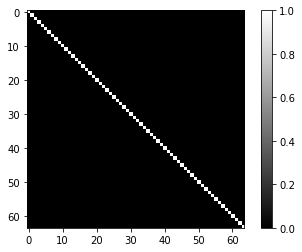

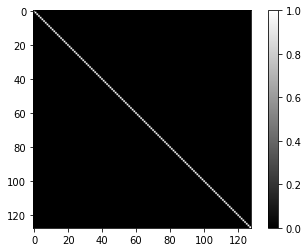

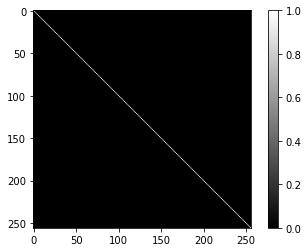

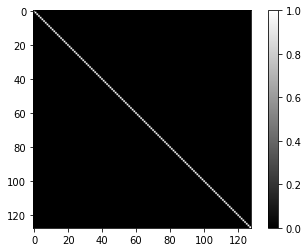

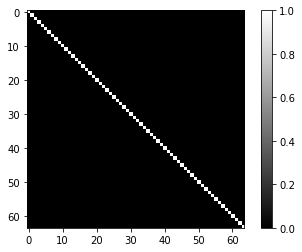

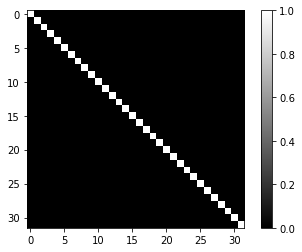

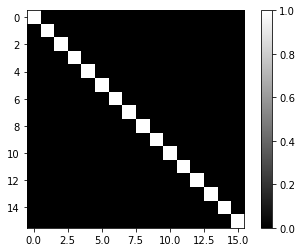

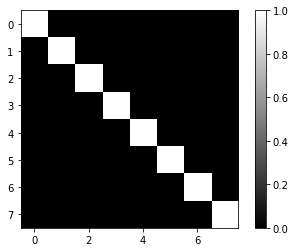

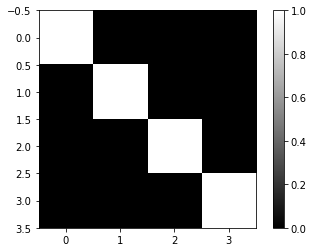

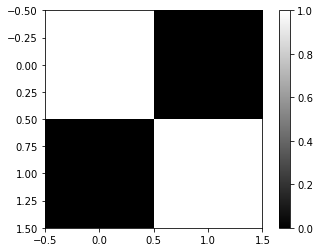

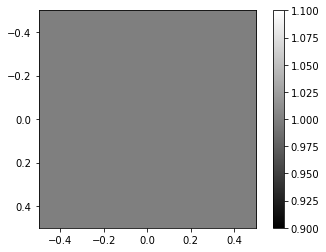

In [5]:
## Normalization condition
for i in range(N):
        plt.figure()
        plt.imshow(np.round(A[i][0,:,:].T.conjugate()@A[i][0,:,:]+A[i][1,:,:].T.conjugate()@A[i][1,:,:]).real, cmap=plt.cm.gray)
        plt.colorbar()

<center><h1><big>QR-decomposition</big></h1></center>

In [271]:
# We initialize again the coefficients of the chain
N   = 10
dim = d**N
c = np.random.rand(dim)+1j*np.random.rand(dim)
#for i in np.arange(dim):
#    if(bin(i).count('1')==N//2): c[i] = 0.
c = c/LA.norm(c)

# Save the configuration in order 
# to check the algorithm
c_check = c.copy()

# At every step A are a set of
# d matrices of dimension (r1 x r2)
A   = []
r1  = 1
for i in range(1,N+1):
    c = c.reshape(r1*d, d**(N-i))
    Q, c = LA.qr(c)
    r2 = c.shape[0]
    A.append(Q.reshape(d,r1,r2,order='F'))
    r1 = r2

res = A[0]
for i in range(1,N):
    res = np.tensordot(res,A[i],axes=[[i+1],[1]])
res = np.squeeze(res)
res_check = res.reshape(d**N)

print('Should be zero: ',LA.norm(c_check-res_check))
print('Should be one:  ',LA.norm(res_check))

Should be zero:  9.014290380483908e-16
Should be one:   1.0


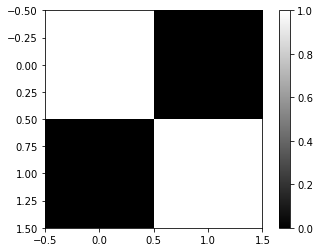

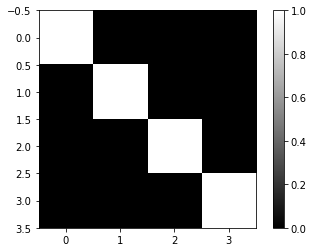

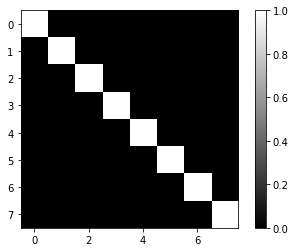

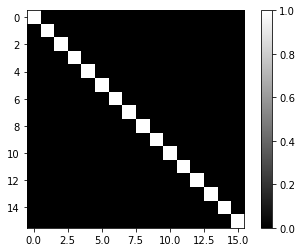

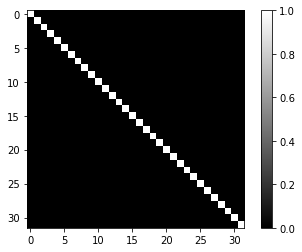

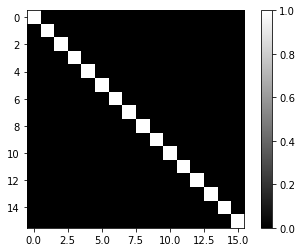

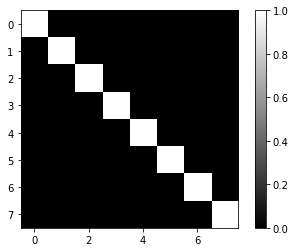

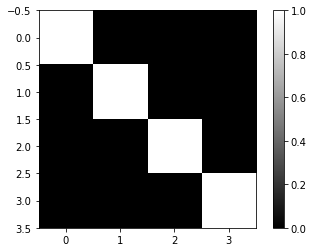

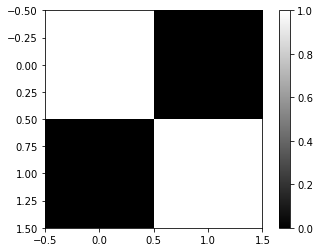

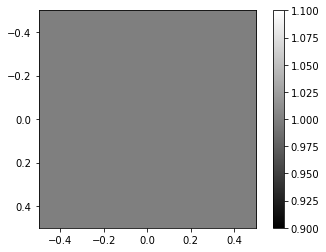

In [272]:
## Normalization condition
for i in range(N):
        plt.figure()
        plt.imshow(np.round(A[i][0,:,:].T.conjugate()@A[i][0,:,:]+A[i][1,:,:].T.conjugate()@A[i][1,:,:]).real, cmap=plt.cm.gray)
        plt.colorbar()

<h2> Right Canonical decomposition </h2>

(2, 1, 2) (2, 2, 1)
(2, 1, 2) (2, 2, 4)
(2, 1, 2, 4) (2, 4, 8)
(2, 1, 2, 2, 8) (2, 8, 16)
(2, 1, 2, 2, 2, 16) (2, 16, 32)
(2, 1, 2, 2, 2, 2, 32) (2, 32, 64)
(2, 1, 2, 2, 2, 2, 2, 64) (2, 64, 128)
(2, 1, 2, 2, 2, 2, 2, 2, 128) (2, 128, 256)
(2, 1, 2, 2, 2, 2, 2, 2, 2, 256) (2, 256, 128)
(2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 128) (2, 128, 64)
(2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 64) (2, 64, 32)
(2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 32) (2, 32, 16)
(2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 16) (2, 16, 8)
(2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8) (2, 8, 4)
(2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4) (2, 4, 2)
(2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2) (2, 2, 1)
Should be zero:  1.4081879434164186
Should be one:   0.9920678002044759


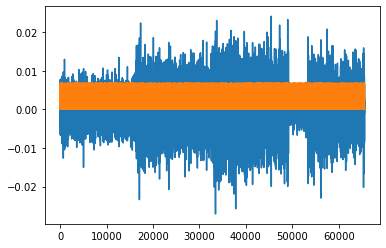

In [6]:
# We initialize again the coefficients of the chain
N   = 16
dim = d**N
c = np.random.rand(dim)#+1j*np.random.rand(dim)
c = c/LA.norm(c)

# Save the configuration in order 
# to check the algorithm
c_check = c.copy()

# At every step A are a set of
# d matrices of dimension (r1 x r2)
B   = []
r1 = 1
for i in range(1,N+1):
    c = c.reshape(d**(N-i),r1*d)
    U, S, V = LA.svd(c, full_matrices=False)
    r2 = S.size
    B.append(V.reshape(d,r2,r1))
    r1 = r2
    c  = (U@np.diag(S).T)

B.reverse()
print(B[0].shape,B[-1].shape)
res = B[0]
for i in range(1,N):
    print(res.shape,B[i].shape)
    res = np.tensordot(res,B[i],axes=[[i+1],[1]])
res = np.squeeze(res)
res = res.reshape(d**N)

plt.plot(res)
plt.plot(c_check)

print('Should be zero: ',LA.norm(c_check-res))
print('Should be one:  ',LA.norm(res))

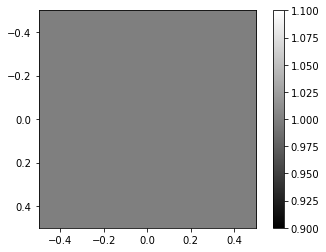

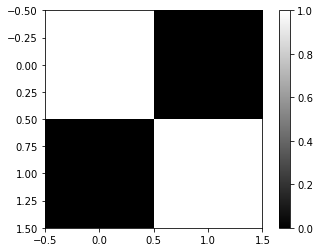

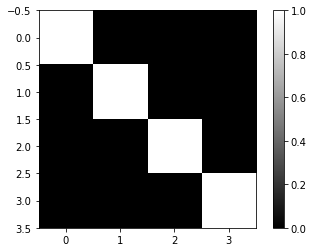

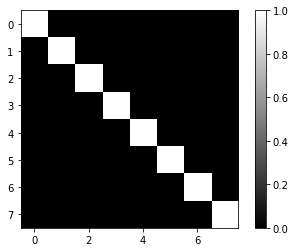

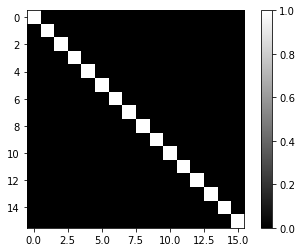

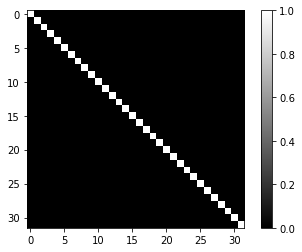

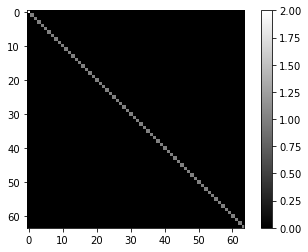

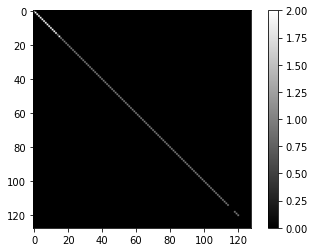

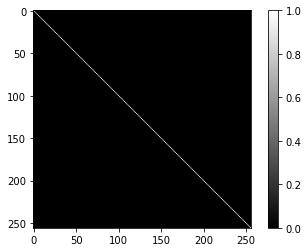

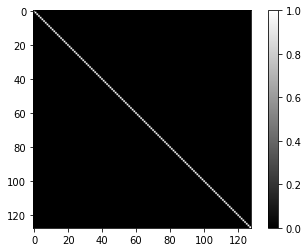

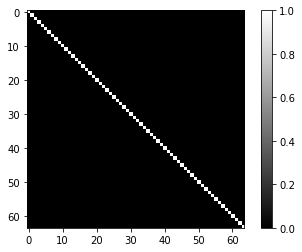

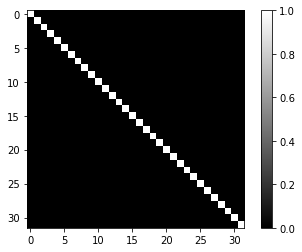

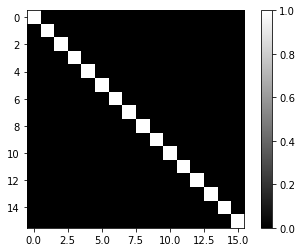

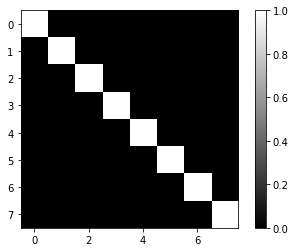

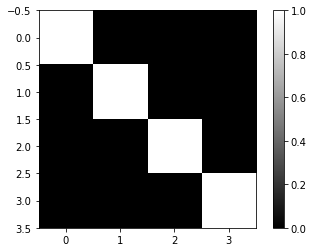

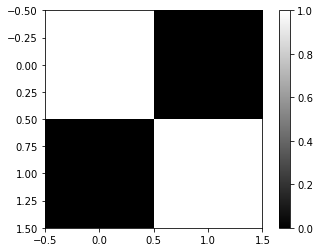

In [262]:
## Normalization condition
for i in range(N):
        plt.figure()
        plt.imshow(np.round(B[i][0,:,:]@B[i][0,:,:].T.conjugate()+B[i][1,:,:]@B[i][1,:,:].T.conjugate()).real, cmap=plt.cm.gray)
        plt.colorbar()

<h1> DALL'INTERNET </h1>

In [ ]:
##### Ex4.1(b): multi-stage decomposition
d = 5 # local dimension
chi = 3 # max internal dimension 
H0 = (np.sqrt(1+np.arange(d**7))).reshape(d,d,d,d,d,d,d).transpose(6,5,4,3,2,1,0) 

# first decomposition
utemp,stemp,vhtemp = LA.svd(H0.reshape(d**2,d**5),full_matrices=False)
U0 = (utemp[:,:chi]).reshape(d,d,chi)
H1 = (np.diag(stemp[:chi]) @ vhtemp[:chi,:]).reshape(chi,d,d,d,d,d)
# second decomposition
utemp,stemp,vhtemp = LA.svd(H1.transpose(1,2,0,3,4,5).reshape(d**2,chi*d**3),full_matrices=False)
U1 = (utemp[:,:chi]).reshape(d,d,chi)
H2 = (np.diag(stemp[:chi]) @ vhtemp[:chi,:]).reshape(chi,chi,d,d,d).transpose(1,0,2,3,4)
# third decomposition
utemp,stemp,vhtemp = LA.svd(H2.reshape(chi**2,d**3),full_matrices=False)
U2 = (utemp[:,:chi]).reshape(chi,chi,chi)
H3 = (np.diag(stemp[:chi]) @ vhtemp[:chi,:]).reshape(chi,d,d,d)
# fourth decomposition
utemp,stemp,vhtemp = LA.svd(H3.reshape(chi*d,d**2),full_matrices=False)
V3 = vhtemp[:chi,:].reshape(chi,d,d).transpose(1,2,0)
H4 = (utemp[:,:chi] @ np.diag(stemp[:chi])).reshape(chi,d,chi)
# check result
H0recovered = ncon([U0,U1,U2,V3,H4],[[-1,-2,1],[-3,-4,2],[1,2,3],[-6,-7,4],[3,-5,4]])
totErr = LA.norm(H0 - H0recovered) / LA.norm(H0)

<h4> References </h4>
<blockquote>
[1.] Ulrich Schollwöck, <a href="https://www.sciencedirect.com/science/article/abs/pii/S0003491610001752?via%3Dihub">The density-matrix renormalization group in the age of matrix product states</a>
</blockquote>